In [1]:
import pysal as ps
import numpy as np

In [2]:
ps.examples.explain('mexico')

{'description': 'Mexican states regional income 1940-2000',
 'explanation': ['Data used in   Rey, S.J. and M.L.  Sastre Gutierrez. (2010) "Interregional inequality',
  'dynamics in Mexico." Spatial Economic Analysis, 5: 277-298',
  '* mexico.csv: attribute data',
  '* mexico.gal: spatial weights in GAL format',
  'Polygon data, n=32, k=13'],
 'name': 'mexico'}

In [3]:
# we will use an updated shapefile rather than the built-in dataset

shp_link = 'data/mexicojoin.shp'
data_table = ps.pdio.read_files(shp_link)

In [4]:
data_table.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,<pysal.cg.shapes.Polygon object at 0x7f17ea2b7...
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,<pysal.cg.shapes.Polygon object at 0x7f17ea31a...
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,<pysal.cg.shapes.Polygon object at 0x7f17ea2b7...
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,<pysal.cg.shapes.Polygon object at 0x7f17ea2b7...
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,<pysal.cg.shapes.Polygon object at 0x7f17ea2b7...


In [5]:
data_table.columns

Index([   u'POLY_ID',       u'AREA',       u'CODE',       u'NAME',
        u'PERIMETER',      u'ACRES',   u'HECTARES',  u'PCGDP1940',
        u'PCGDP1950',  u'PCGDP1960',  u'PCGDP1970',  u'PCGDP1980',
        u'PCGDP1990',  u'PCGDP2000',   u'HANSON03',   u'HANSON98',
       u'ESQUIVEL99',      u'INEGI',     u'INEGI2',       u'MAXP',
           u'GR4000',     u'GR5000',     u'GR6000',     u'GR7000',
           u'GR8000',     u'GR9000',   u'LPCGDP40',   u'LPCGDP50',
         u'LPCGDP60',   u'LPCGDP70',   u'LPCGDP80',   u'LPCGDP90',
         u'LPCGDP00',       u'TEST',   u'geometry'],
      dtype='object')

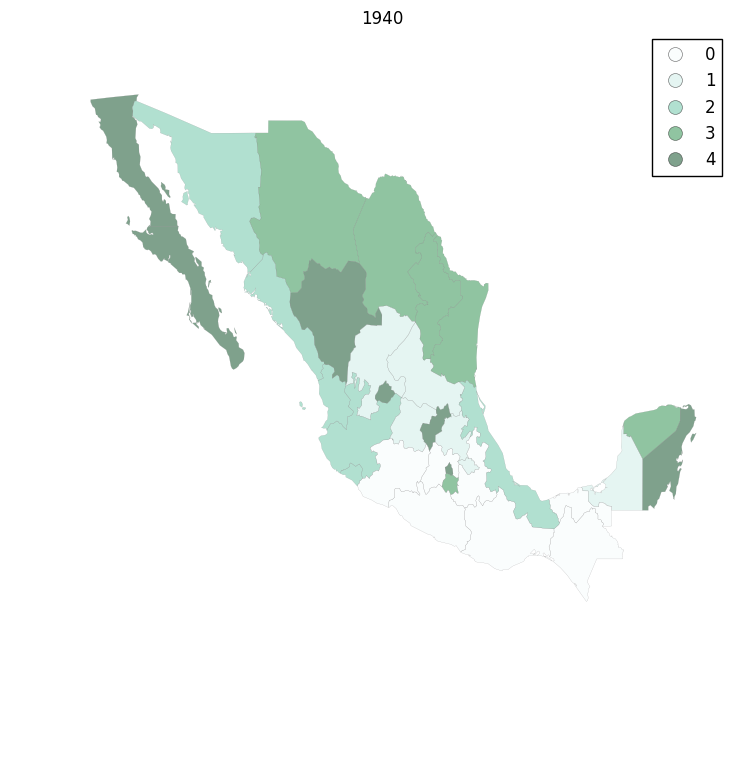

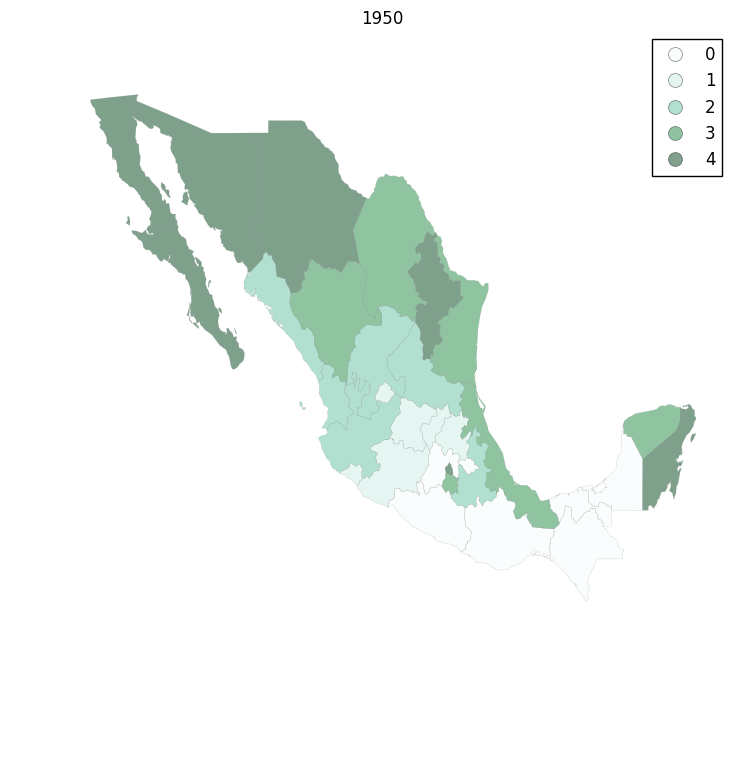

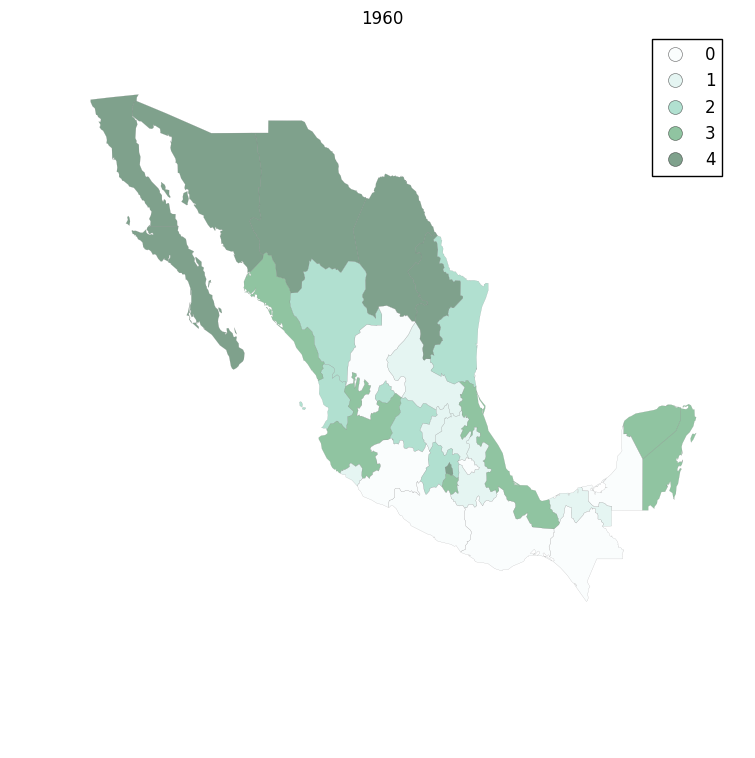

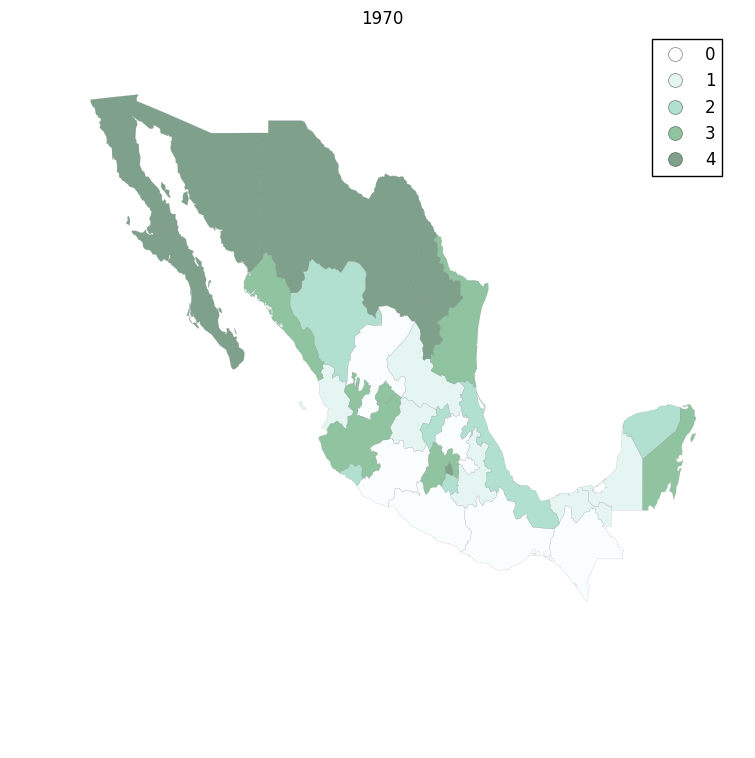

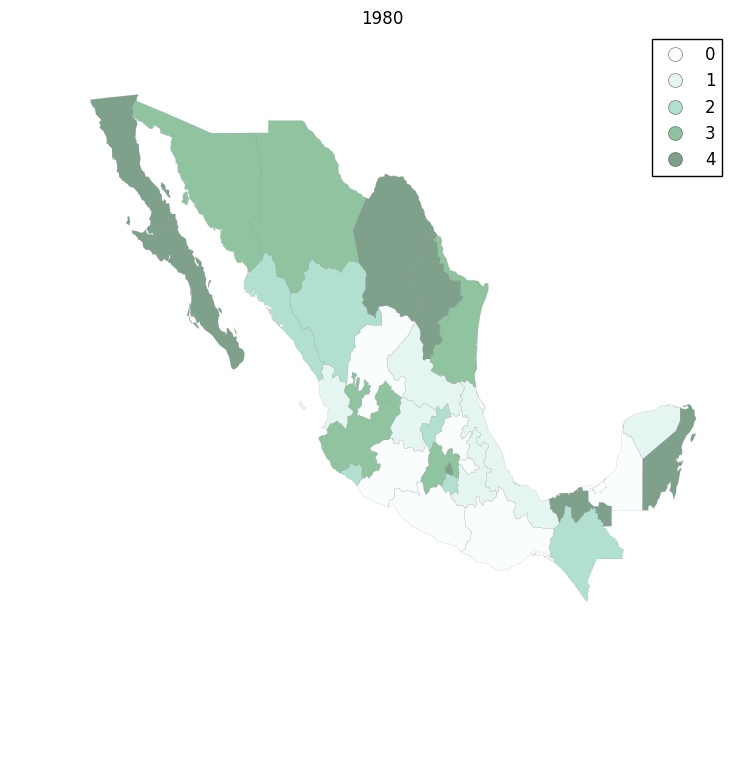

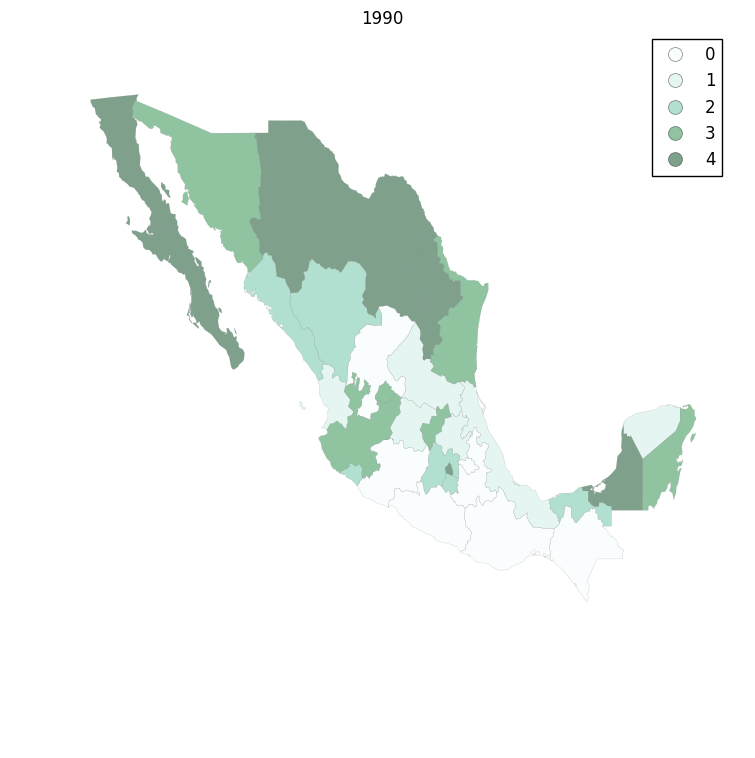

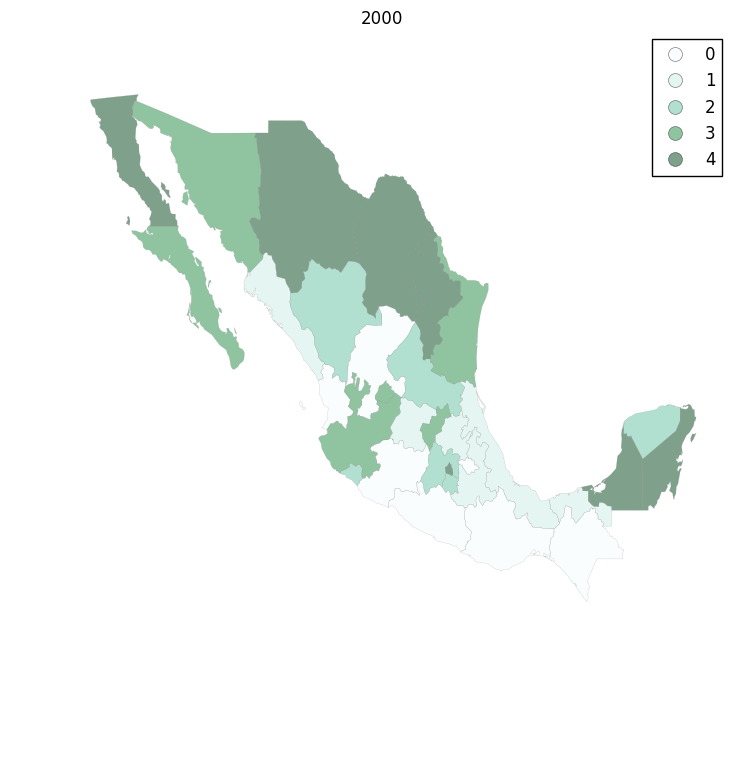

In [31]:
import matplotlib.pyplot as plt
import geopandas as gpd

shp = gpd.read_file(shp_link)

years = range(1940, 2010, 10)

for year in years:
    yi = ps.Quantiles(data_table['PCGDP%d'%year], k=5)
    f, ax = plt.subplots(1, figsize=(9, 9))
    shp.assign(cl=yi.yb).plot(column='cl', categorical=True, \
        k=5, cmap='BuGn', linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
    ax.set_axis_off()
    plt.title(str(year))
    plt.show()


In [7]:
vnames= ["PCGDP%d"%year for year in years]
vnames

['PCGDP1940',
 'PCGDP1950',
 'PCGDP1960',
 'PCGDP1970',
 'PCGDP1980',
 'PCGDP1990',
 'PCGDP2000']

In [8]:
Y = data_table[vnames].values

In [9]:
Y.shape

(32, 7)

## Theil Inequality

$$
T = \sum_{i=1}^n \left( \frac{y_i}{\sum_{i=1}^n y_i} ln \left[ n \frac{y_i}{\sum_{i=1}^n y_i} \right] \right)
$$

In [32]:
theil = ps.Theil(Y)

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


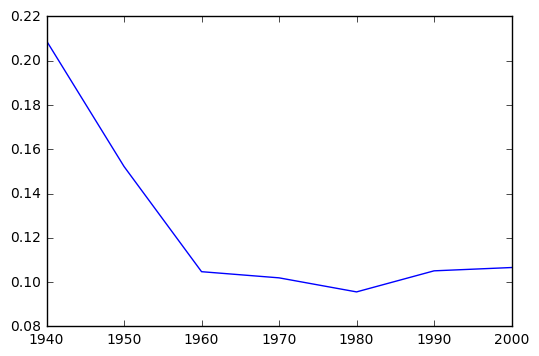

In [34]:
plot(years, theil.T)

## Interregional Decomposition

$$
T^t = \sum_{g=1}^{\omega} s_g^t ln(n/n_g s_g^t) + \sum_{g=1}^{\omega} s_g^t \sum_{i \in g} s_{i,g}^t ln (n_g s_{i,g}^t)
$$

where:

* $\sum_g n_g = n$
* $s_g^t = \sum_{i \in g} y_{i,g}^t / \sum_i^n y_i^t$
* $s_{i,g}^t = y_{i,g}^t / \sum_{i \in g} y_{i,g}^t$

$$
T^t = BG^t + WG^T
$$

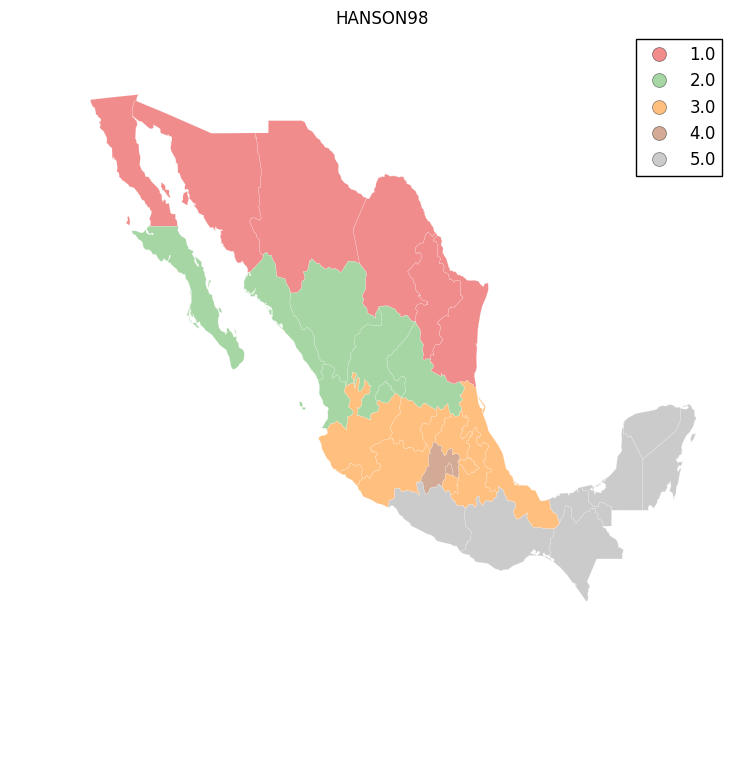

In [35]:
import matplotlib.pyplot as plt
import geopandas as gpd
shp = gpd.read_file(shp_link)


f, ax = plt.subplots(1, figsize=(9, 9))
shp.plot(column='HANSON98', categorical=True, \
       linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title('HANSON98')
plt.show()


In [36]:
regimes = data_table['HANSON98'].values

In [37]:
regimes

array([ 1.,  2.,  2.,  3.,  2.,  3.,  3.,  3.,  3.,  4.,  4.,  3.,  3.,
        5.,  5.,  3.,  5.,  3.,  5.,  5.,  5.,  5.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  1.,  1.,  3.])

In [38]:
theil_d = ps.TheilD(Y, regimes)

In [39]:
regimes.shape

(32,)

In [40]:
Y.shape

(32, 7)

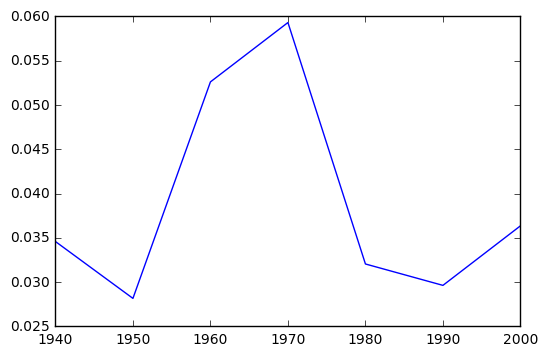

In [41]:
plot(years, theil_d.bg)

In [42]:
theil_d.bg

array([ 0.0345889 ,  0.02816853,  0.05260921,  0.05931219,  0.03205257,
        0.02963731,  0.03635872])

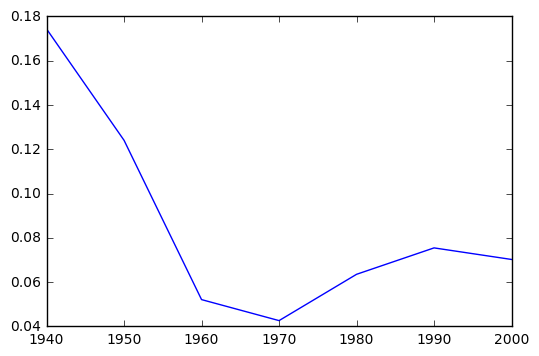

In [43]:
plot(years, theil_d.wg)

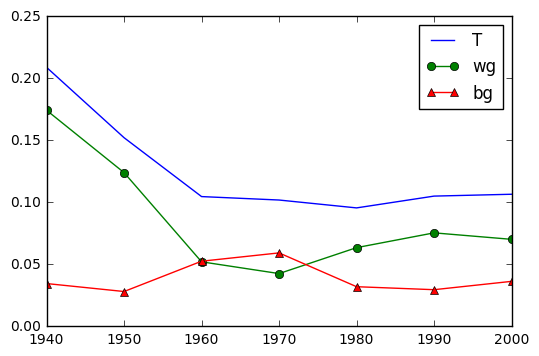

In [44]:
plot(years, theil_d.T, label='T')
plot(years, theil_d.wg, '-o', label='wg')
plot(years, theil_d.bg, '-^', label='bg')
legend()

## Inference

In [45]:
np.random.seed(12345)
theil_ds = ps.TheilDSim(Y, regimes, 999)

In [46]:
theil_ds.bg_pvalue

array([ 0.366,  0.321,  0.003,  0.001,  0.034,  0.074,  0.036])

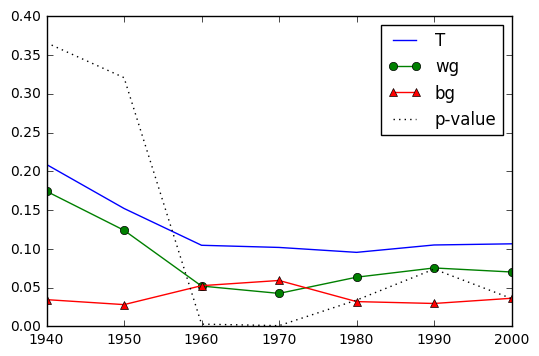

In [47]:
plot(years, theil_d.T, label='T')
plot(years, theil_d.wg, '-o', label='wg')
plot(years, theil_d.bg, '-^', label='bg')
plot(years, theil_ds.bg_pvalue, ':k', label='p-value')
legend()

## Sensitivity to regime definition

In [48]:
regimes = ['HANSON03', 'HANSON98', 'ESQUIVEL99', 'INEGI', 'INEGI2']

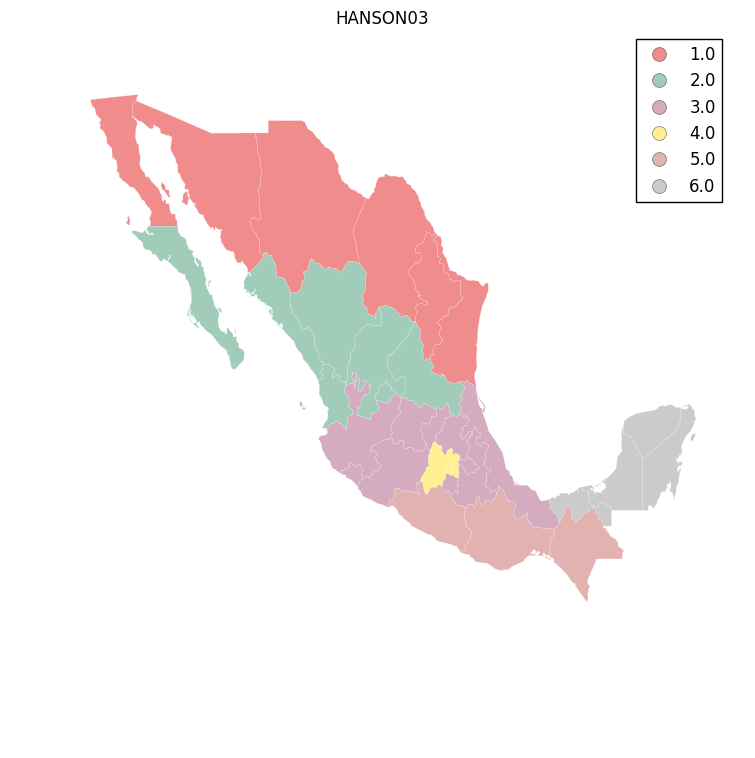

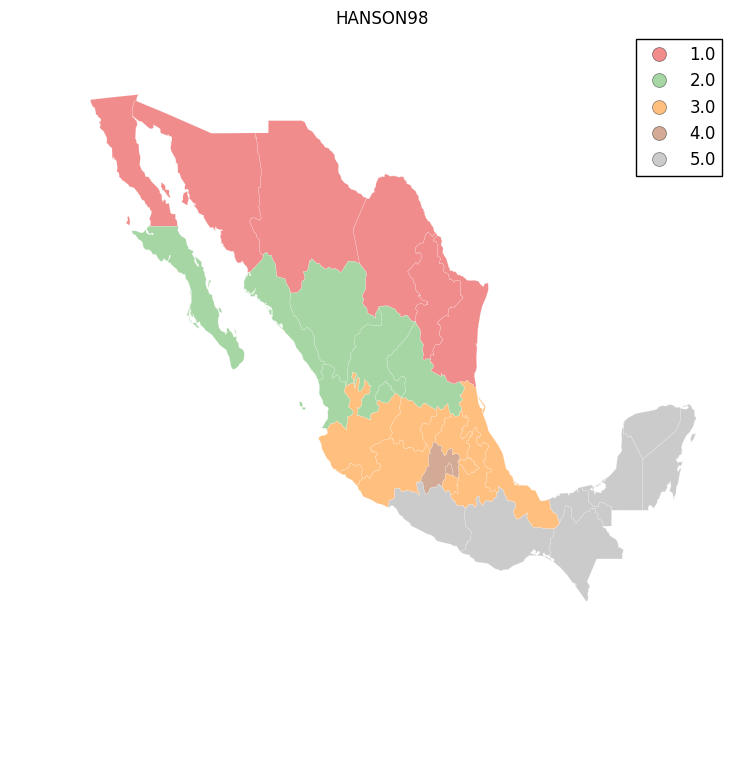

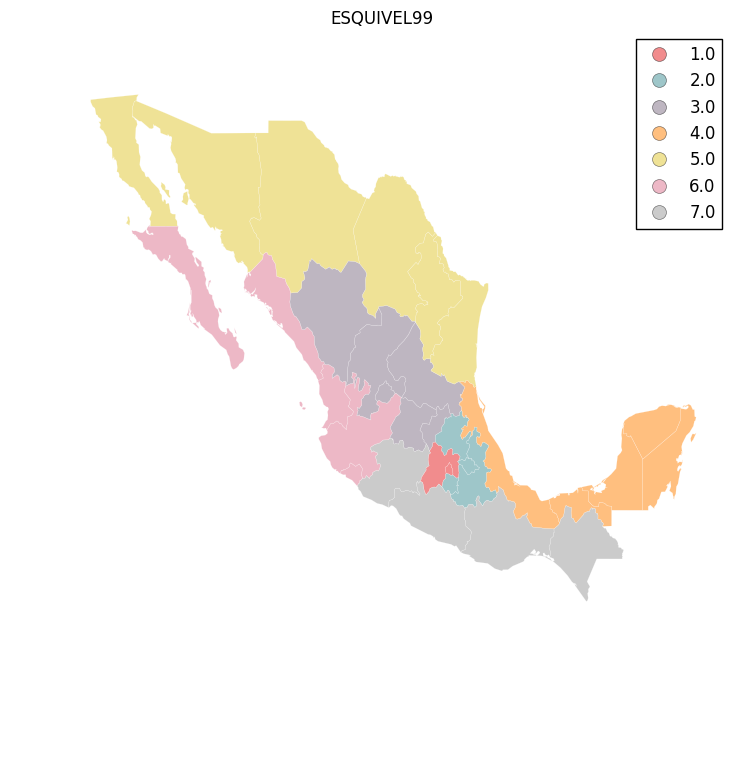

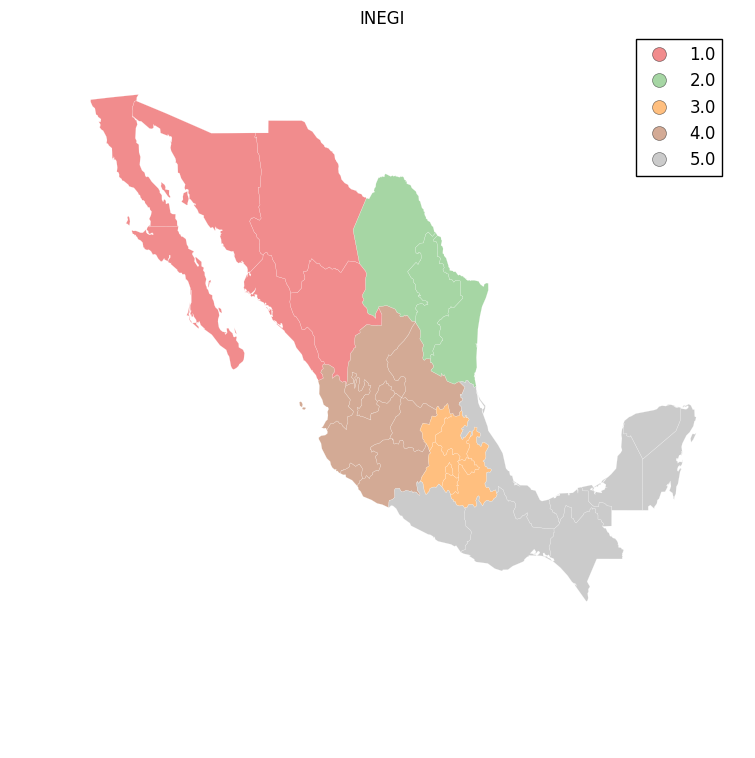

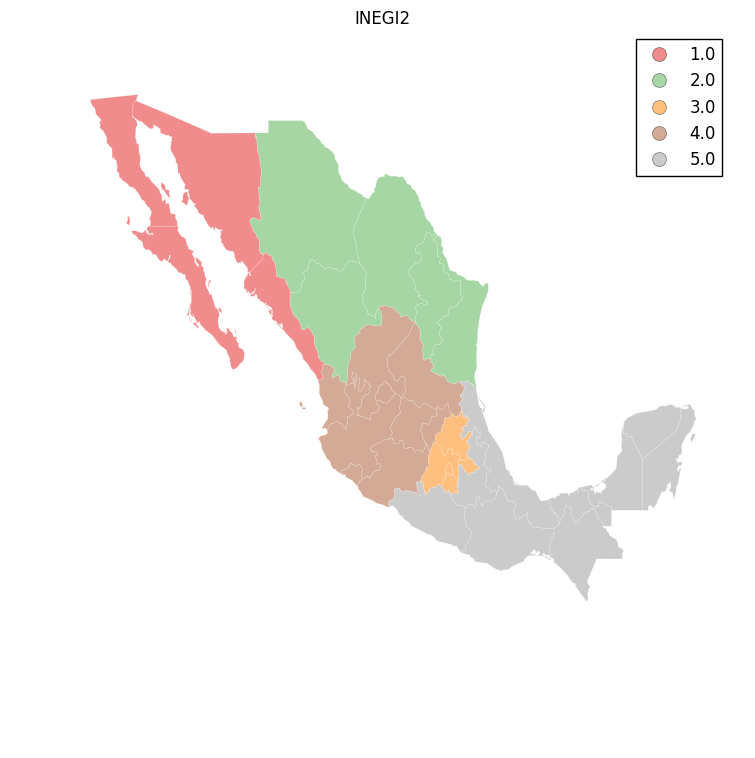

In [49]:
import matplotlib.pyplot as plt
import geopandas as gpd
shp = gpd.read_file(shp_link)

for regime in regimes:
    f, ax = plt.subplots(1, figsize=(9, 9))
    shp.plot(column=regime, categorical=True, \
           linewidth=0.1, ax=ax, \
            edgecolor='white', legend=True)
    ax.set_axis_off()
    plt.title(regime)
    plt.show()

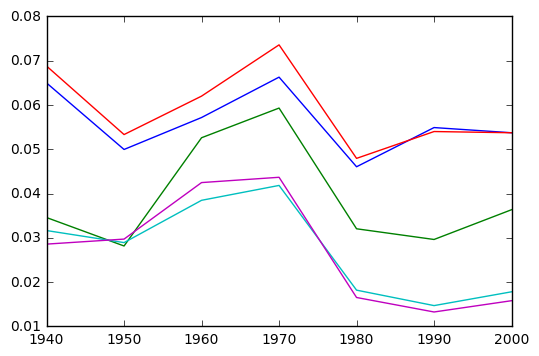

In [28]:
results = {}
for regime in regimes:
    reg = data_table[regime].values
    results[regime] = ps.TheilD(Y, reg)
    plot(years, results[regime].bg)

    

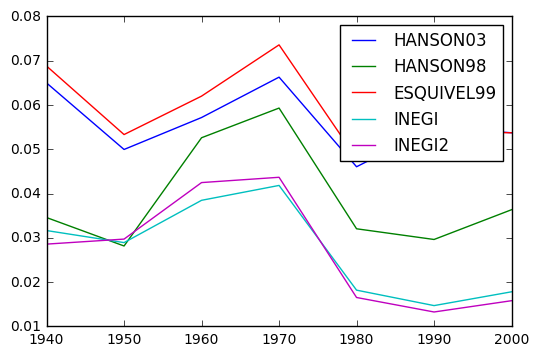

In [29]:
results = {}
for regime in regimes:
    reg = data_table[regime].values
    results[regime] = ps.TheilD(Y, reg)
    plot(years, results[regime].bg, label=regime)

legend()

    

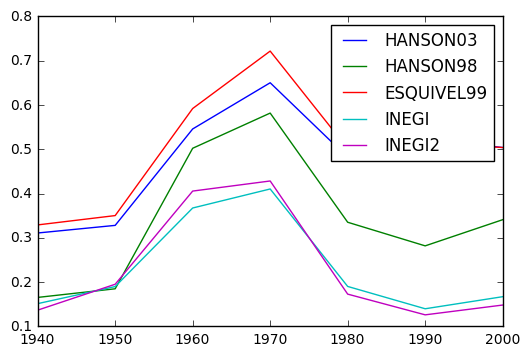

In [30]:
#share of total equality
results = {}
for regime in regimes:
    reg = data_table[regime].values
    results[regime] = ps.TheilD(Y, reg)
    plot(years, results[regime].bg/theil.T, label=regime)

legend()

    